# **Modelling**

### Entrenamiento de modelos de Machine Learning

### **Selección de los Modelos**

1. Decision Tree.
   
2. Random Forest.
   
3. Gradient Boost.
   
4. Logistic Regression.
   
5. RandomForest.

6. SVM.

## **SVM**

SVM (máquina de vectores de soporte) es una técnica de clasificación y regresión que aprovecha al máximo la precisión de las predicciones de un modelo sin ajustar excesivamente los datos de entrenamiento. Este modelo funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo. SVM es ideal para conjuntos de datos grandes. 

Este modelo admite los siguientes tipos de kernel:

1. Lineal

2. Polinómico
   
3. Función de base radial (RBF)

4. Sigmoide


#### LIBRERÍAS NECESARIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm


#### EXTRACCIÓN & CARGA DE DATOS

In [3]:
data_train = pd.read_csv('../data/PROCESADO/data_train.csv', sep=',')

In [4]:
data_train

,PassengerId,CryoSleep,Age,VIP,Transported,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,False,0.0,1,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,True,736.0,0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,False,10383.0,0,1,0,1,0,0,0,1
3,0003_02,0,33.0,0,False,5176.0,0,1,0,1,0,0,0,1
4,0004_01,0,16.0,0,True,1091.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,False,8536.0,0,0,0,1,0,1,0,0
8689,9278_01,1,18.0,0,False,0.0,1,1,1,0,0,0,1,0
8690,9279_01,0,26.0,0,True,1873.0,0,1,1,0,0,0,0,1
8691,9280_01,0,32.0,0,False,4637.0,0,1,0,1,0,1,0,0


### **Preparación del Entrenamiento**

In [5]:
X = data_train.drop("Transported", axis = 1)
y = data_train["Transported"]

#### Separamos los datos en dos conjuntos, uno para el entrenamiento (train), y otro para la validación (test). 70% para el entrenamiento(train), y el 30% de los datos para la validación(test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

print(f'FORMA DEL TRAIN = X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'FORMA DEL TEST = X_test:{X_test.shape}, y_test:{y_test.shape}')

FORMA DEL TRAIN = X_train:(6085, 13), y_train:(6085,)
FORMA DEL TEST = X_test:(2608, 13), y_test:(2608,)


### Estandarización

In [74]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

### Modelo

In [21]:
svc = SVC( kernel = "linear", 
C = 5, 
gamma = "scale", 
random_state = 45)

svc.fit(X_train, y_train)

SVC(C=5, kernel='linear', random_state=45)

In [23]:
print('SVC:')

print('Precisión del Entrenamiento: {0}%'.format(np.round(svc.score(X_train, y_train) * 100, 2)))

print('Precisión del Test: {0}%'.format(np.round(svc.score(X_test, y_test) * 100, 2)))

SVC:
Precisión del Entrenamiento: 62.68%
Precisión del Test: 62.23%


### Matriz de Confusión 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


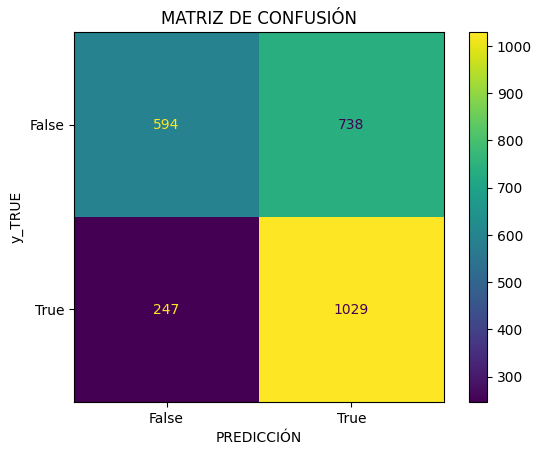

In [25]:
plot_confusion_matrix(svc, X_test, y_test)
plt.xlabel("PREDICCIÓN")
plt.ylabel("y_TRUE")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show();

### **VALIDACIÓN/TEST**

#### CARGA DE DATOS

In [26]:
data_test = pd.read_csv('../data/PROCESADO/data_test.csv', sep=',')

### **PREDICCIÓN**

In [27]:
predic = pd.DataFrame(svc.predict(data_test))

predic['PassengerId'] = data_test['PassengerId']

predic = predic.rename(columns = {0:'Transported'})

predic = predic[['PassengerId','Transported']]

In [28]:
predic

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,False


In [29]:
predic.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

### GUARDAMOS EN UN CSV LA PREDICCIÓN(Submission)

In [30]:
predic.to_csv('../data/SUBMISSIONS/Sub_SVM.csv', index=False)